# مقدمه ای برای رگرسیون
 تو این پروژه ما رگرسیون به سبک خیلی سنتی و با کتابخونه نامپای رو واکاوی می کنیم و به این نتیجه می رسیم که نیازی به کتابخونه و روش های قوی تری برای حل مسائل واقعی تر داریم


## فراخوانی کتابخانه ها

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## درباره دیتا
این دیتا میگه به ازای چقدر خرج کردن در پلتفرم های مختلف، یعنی تلوزیون، رادیو و روزنامه، چه قدر فروش داشتیم


In [9]:
df = pd.read_csv("Advertising.csv")

In [10]:
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

برای این که مسئله رو ساده کنیم، همه ستون های ایکس رو با هم جمع می کنیم تا یک فیچر و یک خروجی داشته باشیم 

آیا رابطه ای بین کل هزینه های صورت گرفته 

برای پاسخ دادن به این سوال نمودار نقطه ای با دو بعد هزینه ها و درآمد ها رو به تصویر می کشیم 

In [11]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

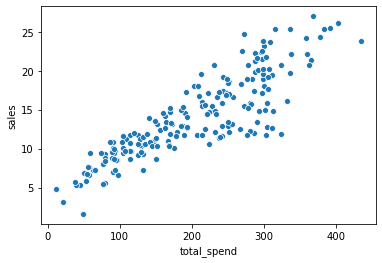

In [12]:
sns.scatterplot(x='total_spend',y='sales',data=df)

## Least Squares Line

به نظر میاد رابطه ی مستقیمی بین هزینه ها و درآمد وجود داره اما حالا فرض کنیم بخوایم بدونیم در صورتی که فلان قدر هزینه کنیم، فلان قدر درآمد خواهیم داشت یا به عبارت دیگه بخوایم پیشبینی انجام بدیم

برای رسیدن به این مهم، نیاز به یک خطی داریم که بر روی داده های فعلی بیشترین تطبیق رو داشته باشه

و هر خطی یک معادله ای داره 

و هر معادله ای یکسری ضرایبی داره و پایتون و کتابخونه هاش به ما کمک می کنن به راحتی بتونیم به این ضرایب برسیم 

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

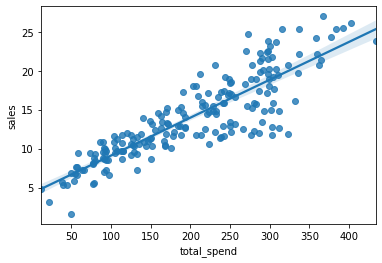

In [13]:
# Basically, we want to figure out how to create this line
sns.regplot(x='total_spend',y='sales',data=df)


$$ \hat{y} = \beta_0 + \beta_1X$$



ما ایکس و ایگرگ رو از دیتاهامون می گیریم 

In [14]:
X = df['total_spend']
y = df['sales']

In [15]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [16]:
# Returns highest order coef first!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [17]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [21]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

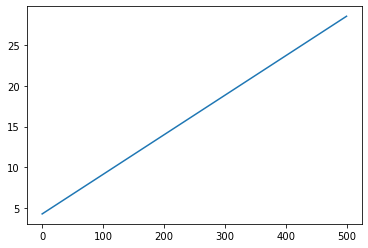

In [22]:
plt.plot(potential_spend,predicted_sales)

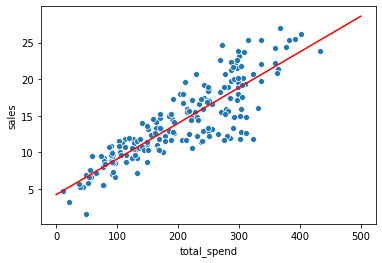

In [24]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [25]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [26]:
predicted_sales

13.98060422

# Further considerations...which we will explore in much more depth!

## Overfitting, Underfitting, and Measuring Performance

Notice we fit to order=1 , essentially a straight line, we can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

In [33]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [34]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)

In [35]:
predicted_sales =   3.07615033e-07*potential_spend**3 + -1.89392449e-04*potential_spend**2 + 8.20886302e-02*potential_spend**1 + 2.70495053e+00

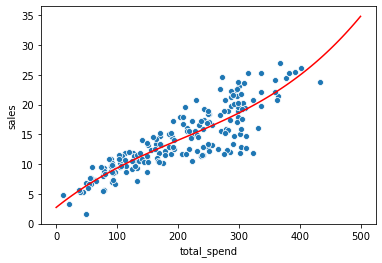

In [40]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

**Is this better than our straight line fit? What are good ways of measuring this?**

## Multiple Features

The real data had 3 features, not everything in total spend, this would allow us to repeat the process and maybe get a more accurate result?

In [37]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [41]:
# Note here we're passing in 3 which matches up with 3 unique features, so we're not polynomial yet
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**Uh oh! Polyfit only works with a 1D X array! We'll need to move on to a more powerful library...**

-------
--------